<h3>Team Forest<br/>
Biomedial Image Processing Application (BIPA)<br/>
CSC821, Prof. K. Okada<br/>
Spring 2022</h3>

Please note: this code uses the Dicom images downloadable at https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=80969742#80969742bcab02c187174a288dbcbf95d26179e8. Downloading the images requires first installing the NBIA Data Retriever on your local machine which is available in the App Store.

<h2>Image I/O</h2>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk

import sys
import os

In [2]:
# example of reading Dicom images from COVID dataset, exporting, and showing outputting 3D image
# axial scan of covid-infected lung showing disease markers

# TO-DO: manually setting path here, need an interface to take input
dicom_dir = "NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)
reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print("Image size:", size[0], size[1], size[2])

print("Writing image:", "MIDRC-RICORD-1A_axial_image.nii")

sitk.WriteImage(image, "MIDRC-RICORD-1A_axial_image.nii")

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(image, "Dicom Series")

Reading Dicom directory: NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100
Image size: 512 512 255
Writing image: MIDRC-RICORD-1A_axial_image.nii


In [3]:
# example of 3D image attributes
covid_example = sitk.ReadImage("./MIDRC-RICORD-1A_axial_image.nii")

print(f"origin: {covid_example.GetOrigin()}")
print(f"size: {covid_example.GetSize()}")
print(f"spacing: {covid_example.GetSpacing()}")
print(f"direction: {covid_example.GetDirection()}\n")

print("Dimensions: " + str(covid_example.GetDimension()))
print("Width: " + str(covid_example.GetWidth()))
print("Height: " + str(covid_example.GetHeight()))
print("Depth: " + str(covid_example.GetDepth()))
print("Pixel ID: " + str(covid_example.GetPixelIDValue()))
print("Pixel Type: " + str(covid_example.GetPixelIDTypeAsString()))
print("Components Per Pixel: " + str(covid_example.GetNumberOfComponentsPerPixel()))

origin: (-192.1999969482422, -180.0, -349.25)
size: (512, 512, 255)
spacing: (0.703125, 0.703125, 1.25)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

Dimensions: 3
Width: 512
Height: 512
Depth: 255
Pixel ID: 4
Pixel Type: 32-bit signed integer
Components Per Pixel: 1


In [4]:

# extract modalities of various embedded scans
from ipywidgets import interact, fixed

data_directory = "NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000361/10-21-2002-NA-CT CHEST WITHOUT CONTRAST-91670/2.000000-ROUTINE CHEST NON-CON-50599"
# Global variable 'selected_series' is updated by the interact function
selected_series = ""
file_reader = sitk.ImageFileReader()


def DICOM_series_dropdown_callback(series_to_load, series_dictionary):
    global selected_series
    # Print some information about the series from the meta-data dictionary
    # DICOM standard part 6, Data Dictionary: http://medical.nema.org/medical/dicom/current/output/pdf/part06.pdf
    file_reader.SetFileName(series_dictionary[series_to_load][0])
    file_reader.ReadImageInformation()
    tags_to_print = {
        "0010|0010": "Patient name: ",
        "0008|0060": "Modality: ",
        "0008|0021": "Series date: ",
        "0008|0080": "Institution name: ",
        "0008|1050": "Performing physician's name: ",
    }
    for tag in tags_to_print:
        try:
            print(tags_to_print[tag] + file_reader.GetMetaData(tag))
        except:  # Ignore if the tag isn't in the dictionary
            pass
    selected_series = series_to_load


# Directory contains multiple DICOM studies/series, store
# in dictionary with key being the series ID
reader = sitk.ImageSeriesReader()
series_file_names = {}
series_IDs = reader.GetGDCMSeriesIDs(data_directory)
# Check that we have at least one series
if series_IDs:
    for series in series_IDs:
        series_file_names[series] = reader.GetGDCMSeriesFileNames(
            data_directory, series
        )

    interact(
        DICOM_series_dropdown_callback,
        series_to_load=list(series_IDs),
        series_dictionary=fixed(series_file_names),
    )
else:
    print("Data directory does not contain any DICOM series.")

interactive(children=(Dropdown(description='series_to_load', options=('1.2.826.0.1.3680043.10.474.419639.44260…

<h2>Registration</h2>

In [5]:
# coronal scan of same patient's covid-infected lung showing disease markers

# TO-DO: manually setting path here, need an interface to take input
dicom_dir = "NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/601.000000-COR 3X3-86740"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print("Image size:", size[0], size[1], size[2])

print("Writing image:", "MIDRC-RICORD-1A_coronal_image.nii")

sitk.WriteImage(image, "MIDRC-RICORD-1A_coronal_image.nii")

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(image, "Dicom Series")

Reading Dicom directory: NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/601.000000-COR 3X3-86740
Image size: 512 512 106
Writing image: MIDRC-RICORD-1A_coronal_image.nii


In [6]:
covid_example = sitk.ReadImage("./MIDRC-RICORD-1A_coronal_image.nii")

print("Dimensions: " + str(covid_example.GetDimension()))
print("Width: " + str(covid_example.GetWidth()))
print("Height: " + str(covid_example.GetHeight()))
print("Depth: " + str(covid_example.GetDepth()))
print("Pixel ID: " + str(covid_example.GetPixelIDValue()))
print("Pixel Type: " + str(covid_example.GetPixelIDTypeAsString()))
print("Components Per Pixel: " + str(covid_example.GetNumberOfComponentsPerPixel()))

Dimensions: 3
Width: 512
Height: 512
Depth: 106
Pixel ID: 4
Pixel Type: 32-bit signed integer
Components Per Pixel: 1


In [7]:
# axial scan of Stonybrook patient A00279's covid-infected lung showing disease markers

# TO-DO: manually setting path here, need an interface to take input
dicom_dir = "stonybrook_covid/manifest-1628608914773/COVID-19-NY-SBU/A002279/12-31-1900-NA-CT CHEST WITHOUT IV CONTRAST-52731/2.000000-5 MM STANDARD-40924"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print("Image size:", size[0], size[1], size[2])

print("Writing image:", "stonybrook_A002279_2.nii")

sitk.WriteImage(image, "stonybrook_A002279_2.nii")

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(image, "Dicom Series")

Reading Dicom directory: stonybrook_covid/manifest-1628608914773/COVID-19-NY-SBU/A002279/12-31-1900-NA-CT CHEST WITHOUT IV CONTRAST-52731/2.000000-5 MM STANDARD-40924


RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_Execute: ../../Code/IO/src/sitkImageSeriesReader.cxx:129:
sitk::ERROR: File names information is empty. Cannot read series.

In [8]:
# TO-DO: manually setting path here, need an interface to take input
dicom_dir = "stonybrook_covid/manifest-1628608914773/COVID-19-NY-SBU/A002279/12-31-1900-NA-CT CHEST WITHOUT IV CONTRAST-52731/3.000000-LUNG 5 MM-65792"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print("Image size:", size[0], size[1], size[2])

print("Writing image:", "stonybrook_A002279_3.nii")

sitk.WriteImage(image, "stonybrook_A002279_3.nii")

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(image, "Dicom Series")

Reading Dicom directory: stonybrook_covid/manifest-1628608914773/COVID-19-NY-SBU/A002279/12-31-1900-NA-CT CHEST WITHOUT IV CONTRAST-52731/3.000000-LUNG 5 MM-65792


RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_Execute: ../../Code/IO/src/sitkImageSeriesReader.cxx:129:
sitk::ERROR: File names information is empty. Cannot read series.

In [9]:

# TO-DO: manually setting path here, need an interface to take input
dicom_dir = "stonybrook_covid/manifest-1628608914773/COVID-19-NY-SBU/A002279/12-31-1900-NA-CT CHEST WITHOUT IV CONTRAST-52731/4.000000-LUNG HR 1.25 MM-54929"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print("Image size:", size[0], size[1], size[2])

print("Writing image:", "stonybrook_A002279_4.nii")

sitk.WriteImage(image, "stonybrook_A002279_4.nii")

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(image, "Dicom Series")

Reading Dicom directory: stonybrook_covid/manifest-1628608914773/COVID-19-NY-SBU/A002279/12-31-1900-NA-CT CHEST WITHOUT IV CONTRAST-52731/4.000000-LUNG HR 1.25 MM-54929


RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_Execute: ../../Code/IO/src/sitkImageSeriesReader.cxx:129:
sitk::ERROR: File names information is empty. Cannot read series.

In [10]:
# manually constructing Dicom image from data at
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6ACUZJ, 
# Subject (1).rar extracted into folder of .dcm image files
# exporting, and showing outputting 3D image

# TO-DO: manually setting path here, need an interface to take input
dicom_dir = "Subject_1/98.12.2"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

# manually build list of names for image series because reader.GetGDCMSeriesFileNames is not working
dicom_names = []
for i in range(56364398,56364823):
    dicom_names.append('Subject_1/98.12.2/' + str(i) + '.dcm')
    # dicom_names = ['Subject_1/98.12.2/56364397.dcm','Subject_1/98.12.2/56364398.dcm','Subject_1/98.12.2/56364399.dcm']

reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print("Image size:", size[0], size[1], size[2])

print("Writing image:", "Subject_1.nii")

sitk.WriteImage(image, "Subject_1.nii")

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(image, "Dicom Series")

Reading Dicom directory: Subject_1/98.12.2
Image size: 512 512 425
Writing image: Subject_1.nii


<h2>Segmentation</h2>

In [2]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

import SimpleITK as sitk

# Download data to work on
%run update_path_to_download_script
# from downloaddata import fetch_data as fdata
from myshow import myshow, myshow3d
  
# Read the image
dicom_dir = "NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)
image = reader.Execute()

seg = image > 200
myshow(sitk.LabelOverlay(image, seg), "Basic Thresholding")

Reading Dicom directory: NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100


interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [4]:
# To visualize the labels image in RGB with needs a image with 0-255 range
image_rgb = sitk.Cast(sitk.RescaleIntensity(image), sitk.sitkUInt8)

<h3>Using Binary</h3>

In [5]:
seg = sitk.BinaryThreshold(image, lowerThreshold=100, upperThreshold=400, insideValue=1, outsideValue=0)
myshow(sitk.LabelOverlay(image_rgb, seg), "Binary Thresholding")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

<h3>Using Otsu</h3>

In [6]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
seg = otsu_filter.Execute(image_rgb)
myshow(sitk.LabelOverlay(image_rgb, seg), "Otsu Thresholding")

print(otsu_filter.GetThreshold() )

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

1.0


In [7]:
# Using an external viewer (ITK-SNAP or 3D Slicer) we identified a visually appealing window-level setting
T1_WINDOW_LEVEL = (1050, 500)

In [8]:
# image = sitk.ReadImage("NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100")
# Rescale the intensities and map them to [0,255], these are the default values for the output
# We will use this image to display the results of segmentation
img_T1_255 = sitk.Cast(
    sitk.IntensityWindowing(
        image,
        windowMinimum=T1_WINDOW_LEVEL[1] - T1_WINDOW_LEVEL[0] / 2.0,
        windowMaximum=T1_WINDOW_LEVEL[1] + T1_WINDOW_LEVEL[0] / 2.0,
    ),
    sitk.sitkUInt8,
)

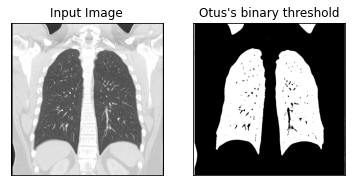

In [9]:
#************
#Can read .jpg, .jpe, .jpeg, .png formats
#In my case I tries images of Coronal lung window.zip in our repo
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Coronal_lung_window/8.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.show()      

<h3>Using ConnectedThreshold</h3>

In [10]:
seg = sitk.ConnectedThreshold(image, seedList=[seed], lower=100, upper=190)
myshow(sitk.LabelOverlay(imgage_rgb, seg), "Connected Threshold")

NameError: name 'seed' is not defined

In [12]:
seg = sitk.ConfidenceConnected(image, seedList=[seed],
                                   numberOfIterations=1,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)

myshow(sitk.LabelOverlay(image_rgb, seg), "ConfidenceConnected")

NameError: name 'seed' is not defined

<h3>Using Level-Set</h3>

In [3]:
stats = sitk.LabelStatisticsImageFilter()
stats.Execute(image, seg)

factor = 3.5
lower_threshold = stats.GetMean(1)-factor*stats.GetSigma(1)
upper_threshold = stats.GetMean(1)+factor*stats.GetSigma(1)
print(lower_threshold,upper_threshold)

-352.31081224397605 1276.8829037161984


In [4]:
init_ls = sitk.SignedMaurerDistanceMap(seg, insideIsPositive=True, useImageSpacing=True)

In [ ]:
lsFilter = sitk.ThresholdSegmentationLevelSetImageFilter()
lsFilter.SetLowerThreshold(lower_threshold)
lsFilter.SetUpperThreshold(upper_threshold)
lsFilter.SetMaximumRMSError(0.02)
lsFilter.SetNumberOfIterations(1000)
lsFilter.SetCurvatureScaling(.5)
lsFilter.SetPropagationScaling(1)
lsFilter.ReverseExpansionDirectionOn()
ls = lsFilter.Execute(init_ls, sitk.Cast(image, sitk.sitkFloat32))
print(lsFilter)

In [ ]:
myshow(sitk.LabelOverlay(image_rgb, ls>0))

### Water Segmentation

In [1]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

import SimpleITK as sitk

# Download data to work on
%run update_path_to_download_script
# from downloaddata import fetch_data as fdata
from myshow import myshow, myshow3d
  
# Read the image
dicom_dir = "NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)
image = reader.Execute()

seg = image > 200
myshow(sitk.LabelOverlay(image, seg), "Watershed Segmentation")




Reading Dicom directory: NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100


interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

### Gradient Water Segmentation

In [2]:
sigma = seg.GetSpacing()[0]
level = 4

In [3]:
feature_seg = sitk.GradientMagnitude(seg)
myshow(seg, "Edge Features")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [4]:
seg = sitk.MorphologicalWatershed(
    feature_seg, level=0, markWatershedLine=True, fullyConnected=False
)
myshow(sitk.LabelToRGB(seg), "Watershed Over Segmentation")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [5]:
from ipywidgets import interact, interactive, FloatSlider


def callback(feature_seg, *args, **kwargs):
    watershed_seg = sitk.MorphologicalWatershed(feature_seg, *args, **kwargs)

    myshow(sitk.LabelToRGB(watershed_seg), "Watershed Segmentation")


interact(
    lambda **kwargs: callback(feature_seg, **kwargs),
    markWatershedLine=True,
    fullyConnected=False,
    level=FloatSlider(min=0, max=255, step=0.1, value=4.0),
)

interactive(children=(Checkbox(value=True, description='markWatershedLine'), Checkbox(value=False, description…

<function __main__.<lambda>(**kwargs)>

### Segmentation From Markers

In [8]:
min_seg = sitk.RegionalMinima(
    seg,
    backgroundValue=0,
    foregroundValue=1.0,
    fullyConnected=False,
    flatIsMinima=True,
)
marker_seg = sitk.ConnectedComponent(min_seg)
myshow(sitk.LabelToRGB(marker_seg), "Too many local minima markers")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [9]:
watershed = sitk.MorphologicalWatershedFromMarkers(
    feature_seg, marker_seg, markWatershedLine=True, fullyConnected=False
)
myshow(sitk.LabelToRGB(watershed), "Watershed Oversegmentation from markers")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

### Binary Watersheds for Object Separation

In [7]:
rgb_seg = sitk.ReadImage(seg)
myshow(rgb_seg, seg)
img = sitk.VectorIndexSelectionCast(rgb_seg, 1)
myshow(seg, seg)

TypeError: in method 'ImageSeriesReader_SetFileNames', argument 2 of type 'std::vector< std::string,std::allocator< std::string > > const &'

In [8]:
feature_seg = sitk.GradientMagnitudeRecursiveGaussian(seg, sigma=1.5)
myshow(feature_seg)

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [9]:
watershed_seg = sitk.MorphologicalWatershed(
    feature_seg, level=4, markWatershedLine=False, fullyConnected=False
)
myshow(sitk.LabelToRGB(watershed_seg), "Watershed Over Segmentation")
segmentated = sitk.ConnectedComponent(watershed_seg != watershed_seg[0, 0])
myshow(sitk.LabelOverlay(seg, segmentated), "Foreground Components")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

IndexError: invalid slice extraction to 1 dimension

In [10]:
filled = sitk.BinaryFillhole(seg != 0)
distance = sitk.SignedMaurerDistanceMap(
    filled, insideIsPositive=False, squaredDistance=False, useImageSpacing=False
)
myshow(distance, "Inside Distance Map")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [11]:
watershed = sitk.MorphologicalWatershed(distance, markWatershedLine=False, level=1)
myshow(sitk.LabelOverlay(seg, watershed))

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [12]:
watershed = sitk.Mask(watershed, sitk.Cast(seg, watershed.GetPixelID()))
myshow(sitk.LabelOverlay(seg, watershed), "Split Objects")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

### Multi-label Morphology

In [13]:
seg = watershed

In [14]:
radius = 10
binary_dilation_seg = sitk.BinaryDilate(seg != 0, [radius] * seg.GetDimension())
myshow(binary_dilation_seg, "Binary Dilate")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [15]:
distance_seg = sitk.SignedMaurerDistanceMap(
    seg != 0, insideIsPositive=False, squaredDistance=False, useImageSpacing=False
)
watershed_distance_img = sitk.MorphologicalWatershedFromMarkers(distance_seg, seg, markWatershedLine=False)
myshow(sitk.LabelOverlay(seg, watershed_distance_img))

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [16]:
multi_label_dilate_seg = sitk.Mask(watershed_distance_img, binary_dilation_seg)
myshow(sitk.LabelToRGB(multi_label_dilate_seg), "Multi-label Dilate")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [17]:
e_seg = sitk.BinaryErode(multi_label_dilate_seg != 0, [radius] * multi_label_dilate_seg.GetDimension())
multi_label_closing_seg = sitk.Mask(multi_label_dilate_seg, e_seg)
myshow(sitk.LabelOverlay(seg, multi_label_closing_seg), "Multi-label Closing")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…


<h3>Quantification</h3>